In [1]:
import numpy as np
import pandas as pd
import math

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# General settings
import matplotlib as mpl
mpl.rc_file('/Users/ulyana/Documents/PhDThesisPlots/matplotlibrc')

In [24]:
mpl.rc('xtick', labelsize = 14) 
mpl.rc('ytick', labelsize = 14)

In [4]:
my_color = '#97a7a7'
my_color_darker = '#2f4f4f'
my_color2 = '#f8c997'
my_color2_darker = '#f6b26b'

In [5]:
PATH_TO_DATA = '/Users/ulyana/Documents/PhDThesisData/LALwf_cfr_BNS/'

In [6]:
bbh_files_tf2_phenomD = ['filtered_data_lal_tf2_for_phenom_bbh_cut_fmin2_fref50', 'filtered_data_lal_phenom_for_tf2_bbh_cut_fmin2_fref50']
bns_files_tf2_phenomD = ['filtered_data_lal_tf2_for_phenom_bns_cut_fmin2_fref50', 'filtered_data_lal_phenom_for_tf2_bns_cut_fmin2_fref50']

bbh_files_xphm_phenomD = ['filtered_data_lal_xphm_for_phenom_bbh_cut_fmin2_fref50', 'filtered_data_lal_phenom_for_xphm_bbh_cut_fmin2_fref50']
bns_files_xphm_phenomD = ['filtered_data_lal_xphm_for_phenom_bns_cut_fmin2_fref50', 'filtered_data_lal_phenom_for_xphm_bns_cut_fmin2_fref50']

In [7]:
lbs = ['snr', 'sky_loc', 'redshift', 'dec', 'err_dec', 'ra', 'err_ra', 'psi',
	'err_psi', 'iota', 'err_iota', 'm1', 'err_m1', 'm2', 'err_m2', 'dist', 'err_dist']

In [8]:
bbh_tf2_phenomD = pd.read_csv(PATH_TO_DATA + bbh_files_tf2_phenomD[0] + '.txt', names=lbs, delimiter=' ')
bbh_phenomD_tf2 = pd.read_csv(PATH_TO_DATA + bbh_files_tf2_phenomD[1] + '.txt', names=lbs, delimiter=' ')

bbh_xphm_phenomD = pd.read_csv(PATH_TO_DATA + bbh_files_xphm_phenomD[0] + '.txt', names=lbs, delimiter=' ')
bbh_phenomD_xphm = pd.read_csv(PATH_TO_DATA + bbh_files_xphm_phenomD[1] + '.txt', names=lbs, delimiter=' ')

bns_tf2_phenomD = pd.read_csv(PATH_TO_DATA + bns_files_tf2_phenomD[0] + '.txt', names=lbs, delimiter=' ')
bns_phenomD_tf2 = pd.read_csv(PATH_TO_DATA + bns_files_tf2_phenomD[1] + '.txt', names=lbs, delimiter=' ')

bns_xphm_phenomD = pd.read_csv(PATH_TO_DATA + bns_files_xphm_phenomD[0] + '.txt', names=lbs, delimiter=' ')
bns_phenomD_xphm = pd.read_csv(PATH_TO_DATA + bns_files_xphm_phenomD[1] + '.txt', names=lbs, delimiter=' ')

In [9]:
params_for_ratio = ['snr', 'sky_loc', 'err_m1', 'err_m2', 'err_dist', 'err_dec', 'err_ra', 'err_psi', 'err_iota']
params_lbs = ['SNR', 'Sky Localization', 'Mass 1', 'Mass 2', 'Luminosity Distance', 'DEC', 'RA', 'Polarization Angle', 'Inclination Angle']

In [10]:
bbh_tf2_phenomD = bbh_tf2_phenomD[params_for_ratio]/bbh_phenomD_tf2[params_for_ratio]
bbh_xphm_phenomD = bbh_xphm_phenomD[params_for_ratio]/bbh_phenomD_xphm[params_for_ratio]

bns_tf2_phenomD = bns_tf2_phenomD[params_for_ratio]/bns_phenomD_tf2[params_for_ratio]
bns_xphm_phenomD = bns_xphm_phenomD[params_for_ratio]/bns_phenomD_xphm[params_for_ratio]

/var/folders/2f/xs1ws1zx6kz2y5t39btv9b6h0000gn/T/ipykernel_33772/2243473337.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend(title=params_lbs[i], title_fontsize=16, loc='upper left', frameon=False)


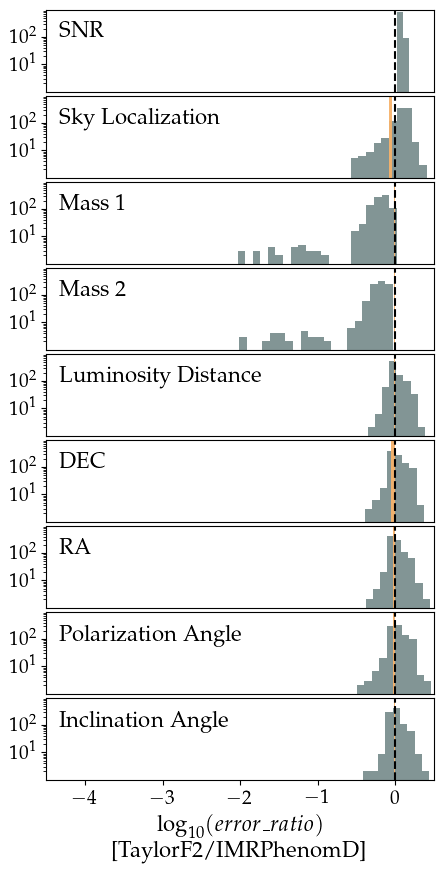

In [29]:
# plot histograms of ratios (vertically): TaylorF2/PhenomD
log_bin_width = 0.1
xlim_sx = -4.5
xlim_dx = +0.5

fig, ax = plt.subplots(len(params_for_ratio), 1, figsize=(5, 10))

for i, param in enumerate(params_for_ratio):
    ax[i].hist(np.log10(bbh_tf2_phenomD[param]), 
               bins=math.ceil((np.log10(max(bbh_tf2_phenomD[param]))-np.log10(min(bbh_tf2_phenomD[param])))/log_bin_width), 
               alpha=0.6, label='', color=my_color_darker)
    ax[i].hist(np.log10(bns_tf2_phenomD[param]), 
               bins=math.ceil((np.log10(max(bns_tf2_phenomD[param]))-np.log10(min(bns_tf2_phenomD[param])))/log_bin_width), 
               alpha=0.95, label='', color=my_color2_darker)
    
    ax[i].set_yscale('log')
    if i != len(params_for_ratio)-1:
        ax[i].set_xticks([])
    ax[i].set_yticks([1e1, 1e2])
    ax[i].axvline(0, color='black', linestyle='--')
    ax[i].set_xlim(xlim_sx, xlim_dx)
    ax[i].set_ylim(1, 1e3)
    ax[i].legend(title=params_lbs[i], title_fontsize=16, loc='upper left', frameon=False)
ax[-1].set_xlabel('$\log_{10}(error\\_ratio)$ \n [TaylorF2/IMRPhenomD]', fontsize=16)
plt.subplots_adjust( 
                    wspace=0.0, 
                    hspace=0.05)
plt.savefig('plots/error_ratios_tf2_phenomD.pdf', bbox_inches='tight')
plt.show()

/var/folders/2f/xs1ws1zx6kz2y5t39btv9b6h0000gn/T/ipykernel_33772/4108346563.py:23: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[i].legend(title=params_lbs[i], title_fontsize=16, loc='upper left', frameon=False)


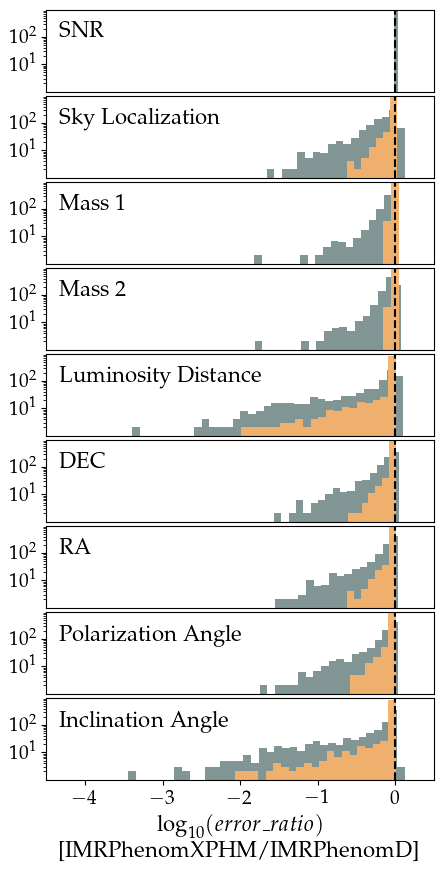

In [26]:
# plot histograms of ratios (vertically): IMRPhenomXPHM/PhenomD
log_bin_width = 0.1
xlim_sx = -4.5
xlim_dx = +0.5

fig, ax = plt.subplots(len(params_for_ratio), 1, figsize=(5, 10))

for i, param in enumerate(params_for_ratio):
    ax[i].hist(np.log10(bbh_xphm_phenomD[param]), 
               bins=math.ceil((np.log10(max(bbh_xphm_phenomD[param]))-np.log10(min(bbh_xphm_phenomD[param])))/log_bin_width), 
               alpha=0.6, label='', color=my_color_darker)
    ax[i].hist(np.log10(bns_xphm_phenomD[param]), 
               bins=math.ceil((np.log10(max(bns_xphm_phenomD[param]))-np.log10(min(bns_xphm_phenomD[param])))/log_bin_width), 
               alpha=0.95, label='', color=my_color2_darker)

    ax[i].set_yscale('log')
    if i != len(params_for_ratio)-1:
        ax[i].set_xticks([])
    ax[i].set_yticks([1e1, 1e2])
    ax[i].axvline(0, color='black', linestyle='--')
    ax[i].set_xlim(xlim_sx, xlim_dx)
    ax[i].set_ylim(1, 1e3)
    ax[i].legend(title=params_lbs[i], title_fontsize=16, loc='upper left', frameon=False)
ax[-1].set_xlabel('$\log_{10}(error\\_ratio)$ \n [IMRPhenomXPHM/IMRPhenomD]', fontsize=16)
plt.subplots_adjust( 
                    wspace=0.0, 
                    hspace=0.05)
plt.savefig('plots/error_ratios_xphm_phenomD.pdf', bbox_inches='tight')
plt.show()